## Importing The Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
import joblib
# from xgboost import XGBRegressor

### READING THE DATA

In [2]:
training_data = pd.read_excel('TrainingData.xlsx')
testing_data = pd.read_excel('TestingData.xlsx')

In [3]:
training_data.shape

(90347, 200)

In [4]:
testing_data.shape

(35202, 200)

#### CONCATENATING THE TRAINING AND TESTING DATA SO DATA MANIPULATION CAN BE MUCH MORE EASIER

In [5]:
df = pd.concat([training_data, testing_data])
df.sample(1)

,Year,Quarter,Country,Local Material Description,Product ID,Local Brand Name,Local Sub-Brand Name,Product Type,Global Brand Name,Standard Brand Name,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
9677,2020,Q1,United Kingdom,TP OR OJ 250ML,647382,BRAND133,TPP SINGLE SERVE,BEVERAGE,BRAND6,BRAND6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PERFORMING THE EXPLORATION DATA ANALYSIS (EDA)

In [6]:
df.shape

(125549, 200)

In [7]:
df.isnull().sum()[:20]

Year                              0
Quarter                           0
Country                           0
Local Material Description       10
Product ID                        0
Local Brand Name               1589
Local Sub-Brand Name          34083
Product Type                      0
Global Brand Name                 0
Standard Brand Name               0
Standard Sub-Brand Name           0
Category Name                 36198
Sub-Category Name             40907
Segment Name                  41873
Sub-Segment Name              48562
Volume Units                  16316
Flavor                        13794
Standard Flavor Name          56472
Kilojoules                    56526
Total Calories                13796
dtype: int64

In [8]:
df.describe()

,Year,Product ID,Kilojoules,Total Calories,Total Fat,Calories from Fat,Calories From Saturated Fat,Calories - Canada,Saturated Fat,Saturated Fat per 100 kcals,...,Flouride,Glycerol,Inulin,L-Arginine,L-Carnitine,Monosaccharides,Neotame,Nitrogen,Phenylalanine + Tyrosine,Polydextrose
count,125549.000000,1.255490e+05,69023.000000,111753.000000,110115.000000,14912.000000,4894.000000,9698.000000,111722.000000,111671.000000,...,2857.000000,7790.000000,7790.000000,0.0,0.0,4317.000000,2712.0,3626.000000,9516.000000,7790.0
mean,2020.418888,1.773340e+07,850.268002,414.013094,21.482599,151.489010,64.127832,245.511851,5.398496,1.157886,...,0.000158,0.000670,0.004291,NaN,NaN,0.118410,0.0,0.000742,0.019457,0.0
std,0.721410,9.605795e+06,971.326889,183.593030,13.658256,127.544915,35.342008,209.108309,5.202982,1.138221,...,0.002168,0.024137,0.091771,NaN,NaN,0.362768,0.0,0.016823,0.119736,0.0
min,2020.000000,3.709360e+05,0.000000,0.000000,0.000000,0.000000,5.670000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
25%,2020.000000,1.111811e+07,0.000000,385.106000,7.400000,0.676000,37.890000,23.376000,1.620000,0.420000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
50%,2020.000000,2.323305e+07,201.000000,497.000000,25.500000,194.520000,45.404000,331.231000,3.780000,0.810000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
75%,2021.000000,2.491303e+07,2053.405000,531.571000,32.400000,263.080000,95.607000,442.508500,8.500000,2.000000,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0
max,2022.000000,2.767305e+07,3076.000000,748.000000,82.500000,470.580000,136.212000,624.046000,61.019000,79.290000,...,0.030000,0.870000,2.022000,NaN,NaN,1.906000,0.0,0.460000,1.656000,0.0


In [9]:
# Getting Rid Of columns with over 60% of null values

df = df.loc[:, df.isnull().mean() < .6]
df.isnull().sum()[:5]

Year                           0
Quarter                        0
Country                        0
Local Material Description    10
Product ID                     0
dtype: int64

In [10]:
df.shape

(125549, 48)

In [11]:
df.columns

Index(['Year', 'Quarter', 'Country', 'Local Material Description',
       'Product ID', 'Local Brand Name', 'Local Sub-Brand Name',
       'Product Type', 'Global Brand Name', 'Standard Brand Name',
       'Standard Sub-Brand Name', 'Category Name', 'Sub-Category Name',
       'Segment Name', 'Sub-Segment Name', 'Volume Units', 'Flavor',
       'Standard Flavor Name', 'Kilojoules', 'Total Calories', 'Total Fat',
       'Saturated Fat', 'Saturated Fat per 100 kcals', 'Trans Fatty Acids',
       'Cholesterol', 'Carbohydrate Total', 'Sugars', 'Added Sugars',
       'Calories from Added Sugars per 355ml', '% of Energy from Added Sugars',
       'Sodium', 'Sodium per kcal', 'Protein', 'Dietary Fiber', 'Whole Grains',
       'Fruits - Solids', 'Fruits - Liquids', 'Vegetables - Solids',
       'Vegetables - Liquids', 'Total Dairy Products', 'Nuts & Seeds',
       'Calcium', 'Iron', 'Magnesium', 'Potassium', 'Vitamin A', 'Vitamin C',
       'Vitamin D'],
      dtype='object')

In [12]:
# Inspecting Each Columns unique values
for col in df.columns:
    print(df[col])     
    print(df[col].unique()) 
    print("="*60)

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
35197    2022
35198    2022
35199    2022
35200    2022
35201    2022
Name: Year, Length: 125549, dtype: int64
[2020 2021 2022]
0        Q1
1        Q1
2        Q1
3        Q1
4        Q1
         ..
35197    Q1
35198    Q1
35199    Q1
35200    Q1
35201    Q1
Name: Quarter, Length: 125549, dtype: object
['Q1' 'Q2' 'Q3' 'Q4']
0                Egypt
1                Egypt
2                Egypt
3                Egypt
4                Egypt
             ...      
35197    United States
35198    United States
35199    United States
35200    United States
35201    United States
Name: Country, Length: 125549, dtype: object
['Egypt' 'Pakistan' 'South Africa' 'India' 'Saudi Arabia' 'Australia'
 'Philippines' 'Thailand' 'Vietnam' 'China' 'France' 'Germany'
 'Netherlands' 'Poland' 'Romania' 'Spain' 'Ukraine' 'Russian Federation'
 'Turkey' 'United Kingdom' 'Canada' 'United States' 'Colombia' 'Brazil'
 'Mexico']
0 

['POTATO CHIP' 'TORTILLA CHIPS' 'RTE POPCORN' 'EXTRUDED / PELLETS'
 'MULTIGRAIN' 'JUICES & STILL FLAVOURED DRINKS' 'HOT CEREAL'
 'CARBONATED SOFT DRINKS' 'SPORTS DRINKS' 'CORN CHIPS' 'NUTS & SEEDS'
 'TRAIL MIX' 'PRETZEL' 'NAMKEENS' nan 'SALSA / DIPS' 'MEAT JERKY'
 'PORK RIND' 'SAVOURY BISCUITS' 'OTHER GRAIN SNACKS' 'SNACK MIX'
 'FRUIT & VEGGIE CHIPS' 'VARIETY MULTIPACK' 'ENERGY DRINKS' 'RTE CEREALS'
 'CRACKERS' 'RTD TEA' 'BARS' 'BABY FOODS' 'ALL OTHER SAVOURY'
 'MICROWAVE & KERNEL POPCORN' 'ALL OTHER SALTY' 'PUFFED CAKES'
 'MODERN DAIRY FOODS' 'TRADITIONAL DAIRY BEVERAGES'
 'TRADITIONAL DAIRY FOODS' 'MODERN DAIRY BEVERAGES' 'DAIRY FOODS'
 'BREAD SNACKS' 'CONFECTIONARY' 'BREAKFAST BISCUIT'
 'PITA & BAGEL CHIPS/ CRISPS/ THINS' 'FLAVORED RICE / PASTA' 'COOKIES'
 'POPPED CHIPS' 'COLD CEREAL' 'PANCAKE SYRUP' 'PANCAKE MIX'
 'ENGINEERED NUTRITION' 'WATER' 'RICE & PASTA DISHES']
0                     POTATO CHIP
1        FLAVOURED TORTILLA CHIPS
2        FLAVOURED TORTILLA CHIPS
3             

[       nan 0.0000e+00 1.1000e+01 6.7000e+00 3.0000e+00 1.3100e+01
 1.9500e+01 2.7000e+00 2.4000e+01 2.1000e+01 4.0000e+00 2.5000e+01
 1.4500e+01 1.9000e+01 8.1000e+01 1.0000e+01 1.8000e+01 8.6000e+00
 1.5000e+01 3.3000e+01 7.0000e+00 2.0000e+01 1.5000e+00 8.0000e+00
 3.8000e+01 1.0620e+01 2.0000e+00 2.9000e+01 2.6000e+01 1.2300e+01
 1.0000e+02 1.3000e+01 1.7100e+01 4.0000e+01 2.2500e+01 2.2000e+01
 6.0000e+00 1.2200e+01 6.2800e+00 5.3000e+00 8.5000e+00 3.6000e+00
 4.5000e+00 4.9000e+00 4.2000e+00 1.2000e+01 1.4000e+01 3.9000e+01
 9.9000e+00 2.5500e+01 1.4100e+01 1.5790e+01 5.3000e+01 3.6800e+01
 3.0000e+01 9.0000e+00 4.8000e+01 9.1000e+00 5.0000e+01 1.0700e+01
 2.8000e+00 3.2000e+00 7.2000e+00 4.2000e+01 4.5000e+01 3.5000e+01
 1.2500e+01 2.9000e+00 2.6000e+00 1.7000e+01 8.3000e+00 3.1300e+01
 5.8000e+00 4.3000e+00 5.0000e+00 7.3000e+00 4.6000e+00 6.4000e+00
 3.7000e+00 5.5000e+00 6.6000e+00 4.7000e+00 6.2000e+00 3.4000e+00
 2.1000e+00 9.0000e-01 1.1700e+01 4.1000e+00 2.5000e+00 8.7000

In [13]:
df['Year'].unique()

array([2020, 2021, 2022], dtype=int64)

## DATA VISUALIZATION

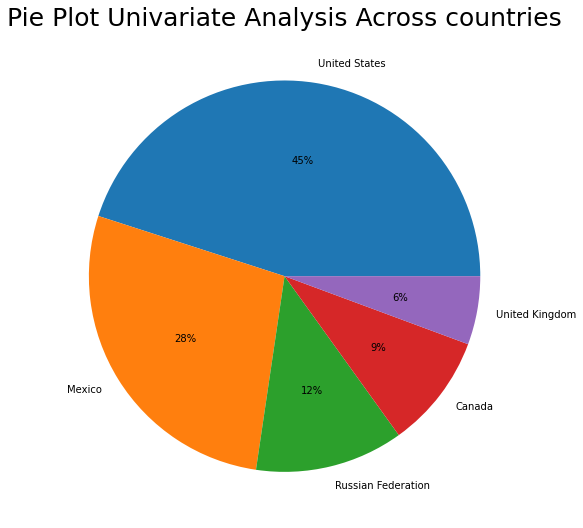

In [14]:
country_pie = df.groupby('Country')['Country'].count().sort_values(ascending=False)[:5]

plt.figure(figsize=(9,9))
plt.pie(country_pie, labels=country_pie.index, autopct="%.0f%%")
plt.title('Pie Plot Univariate Analysis Across countries', fontsize=25)
plt.show()

## The graph above shows the analysis of products across different Countries with US having the highest and UK having the lowest  

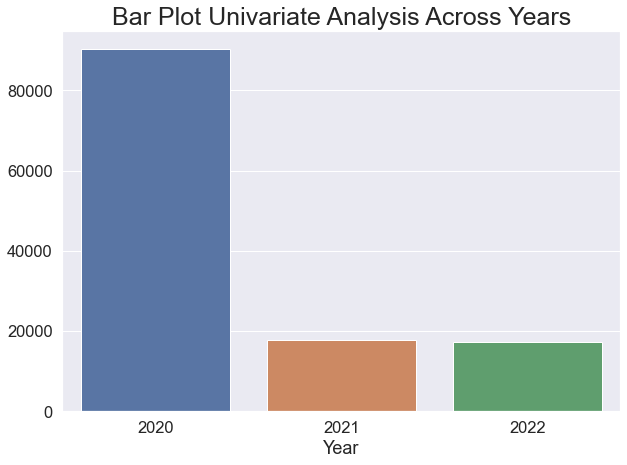

In [15]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,7))
sns.barplot(x=df.groupby('Year').Year.count().index,y=df.groupby('Year').Year.count().values)
plt.title('Bar Plot Univariate Analysis Across Years', fontsize=25)
plt.show()

## The Above bar plot reveals that the year 2020 has the highest volume of sales.

In [16]:
df.columns


Index(['Year', 'Quarter', 'Country', 'Local Material Description',
       'Product ID', 'Local Brand Name', 'Local Sub-Brand Name',
       'Product Type', 'Global Brand Name', 'Standard Brand Name',
       'Standard Sub-Brand Name', 'Category Name', 'Sub-Category Name',
       'Segment Name', 'Sub-Segment Name', 'Volume Units', 'Flavor',
       'Standard Flavor Name', 'Kilojoules', 'Total Calories', 'Total Fat',
       'Saturated Fat', 'Saturated Fat per 100 kcals', 'Trans Fatty Acids',
       'Cholesterol', 'Carbohydrate Total', 'Sugars', 'Added Sugars',
       'Calories from Added Sugars per 355ml', '% of Energy from Added Sugars',
       'Sodium', 'Sodium per kcal', 'Protein', 'Dietary Fiber', 'Whole Grains',
       'Fruits - Solids', 'Fruits - Liquids', 'Vegetables - Solids',
       'Vegetables - Liquids', 'Total Dairy Products', 'Nuts & Seeds',
       'Calcium', 'Iron', 'Magnesium', 'Potassium', 'Vitamin A', 'Vitamin C',
       'Vitamin D'],
      dtype='object')

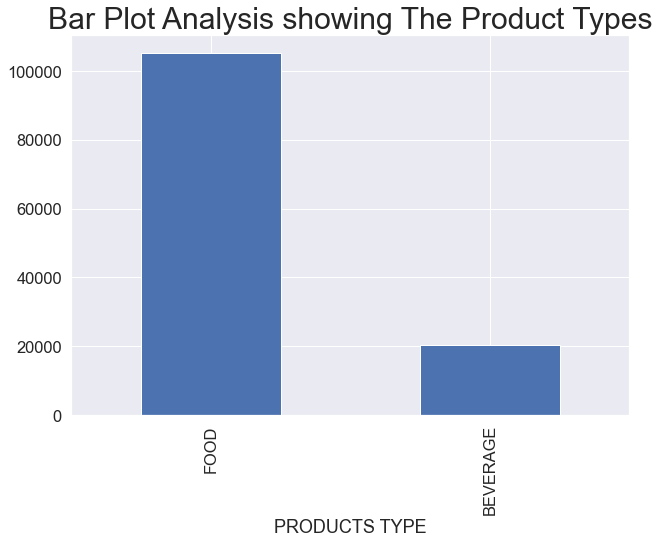

In [17]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,7))
df['Product Type'].value_counts().plot(kind='bar')
plt.xlabel('PRODUCTS TYPE')
plt.title("Bar Plot Analysis showing The Product Types", fontsize=30)
plt.show()

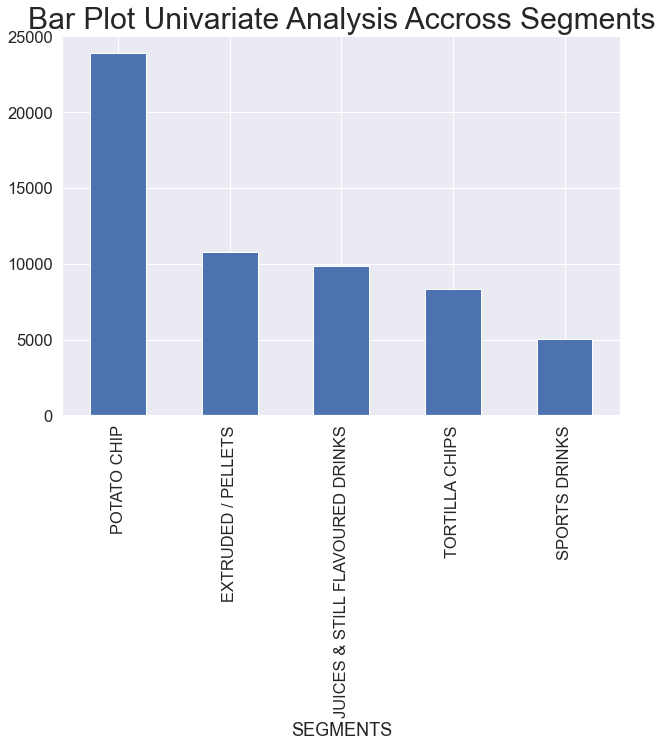

In [18]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,7))
df['Segment Name'].value_counts()[:5].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('SEGMENTS')
plt.title("Bar Plot Univariate Analysis Accross Segments", fontsize=30)
plt.show()

# DATA PREPROCESSING 

## Drop The Unnecessary Columns

In [19]:
cols_to_be_dropped = ['Local Material Description', 'Product ID','Local Brand Name','Local Sub-Brand Name','Global Brand Name',
                     'Standard Sub-Brand Name', 'Sub-Category Name','Sub-Segment Name','Volume Units','Standard Flavor Name',
                     'Kilojoules','Saturated Fat per 100 kcals','% of Energy from Added Sugars','Sodium per kcal','Whole Grains',
                     'Standard Brand Name', 'Flavor','Segment Name']

df.drop(cols_to_be_dropped, axis=1, inplace=True)
df.columns

Index(['Year', 'Quarter', 'Country', 'Product Type', 'Category Name',
       'Total Calories', 'Total Fat', 'Saturated Fat', 'Trans Fatty Acids',
       'Cholesterol', 'Carbohydrate Total', 'Sugars', 'Added Sugars',
       'Calories from Added Sugars per 355ml', 'Sodium', 'Protein',
       'Dietary Fiber', 'Fruits - Solids', 'Fruits - Liquids',
       'Vegetables - Solids', 'Vegetables - Liquids', 'Total Dairy Products',
       'Nuts & Seeds', 'Calcium', 'Iron', 'Magnesium', 'Potassium',
       'Vitamin A', 'Vitamin C', 'Vitamin D'],
      dtype='object')

In [20]:
# filling the Null values in the Category column
cat_mode = df['Category Name'].mode()[0]
df['Category Name'].fillna(cat_mode, inplace=True)

# value counts
df['Category Name'].value_counts()

SAVOURY SNACKS        95357
BEVERAGES             15449
DAIRY                  4636
FOODS                  3473
GRAINS                 3366
COOKIES & CRACKERS     1768
CONFECTIONARY           990
NUTRITION               488
DAIRY FOODS              16
DAIRY BEVERAGES           6
Name: Category Name, dtype: int64

## Making use of The LabelEncoder technique to encode columns with few categorical variables

In [21]:
le = LabelEncoder()
cols_to_be_le = ['Quarter', 'Product Type']
for col in df[cols_to_be_le]:
    df[col] = le.fit_transform(df[col])
    print(df[col].unique())

[0 1 2 3]
[1 0]


## One Hot Encoding the columns with many categorical variables

In [22]:
df = pd.get_dummies(df, columns=['Category Name','Country'])

In [23]:
df.head()

,Year,Quarter,Product Type,Total Calories,Total Fat,Saturated Fat,Trans Fatty Acids,Cholesterol,Carbohydrate Total,Sugars,...,Country_Russian Federation,Country_Saudi Arabia,Country_South Africa,Country_Spain,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Vietnam
0,2020,0,1,488.0,28.0,13.0,0.0,NaN,51.0,1.8,...,0,0,0,0,0,0,0,0,0,0
1,2020,0,1,499.0,26.0,12.0,0.0,NaN,59.0,2.9,...,0,0,0,0,0,0,0,0,0,0
2,2020,0,1,491.0,25.0,12.0,0.0,NaN,58.0,4.4,...,0,0,0,0,0,0,0,0,0,0
3,2020,0,1,488.0,28.0,13.0,NaN,NaN,52.0,1.7,...,0,0,0,0,0,0,0,0,0,0
4,2020,0,1,496.0,29.0,13.0,NaN,NaN,52.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# checking unique values
cols_with_int_flt__dtypes = df.select_dtypes(include=['int','float']).columns.tolist()
for col in cols_with_int_flt__dtypes:
    print(df[col])
#     print(df[col].unique())
    print()
    

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
35197    2022
35198    2022
35199    2022
35200    2022
35201    2022
Name: Year, Length: 125549, dtype: int64

0        0
1        0
2        0
3        0
4        0
        ..
35197    0
35198    0
35199    0
35200    0
35201    0
Name: Quarter, Length: 125549, dtype: int32

0        1
1        1
2        1
3        1
4        1
        ..
35197    1
35198    1
35199    1
35200    1
35201    1
Name: Product Type, Length: 125549, dtype: int32

0        488.000
1        499.000
2        491.000
3        488.000
4        496.000
          ...   
35197    542.857
35198    400.000
35199    542.857
35200    514.286
35201    500.000
Name: Total Calories, Length: 125549, dtype: float64

0        28.000
1        26.000
2        25.000
3        28.000
4        29.000
          ...  
35197    37.143
35198    20.000
35199    37.143
35200    34.286
35201    38.889
Name: Total Fat, Length: 125549, dtype: float64

0

## Filtering out the columns with float dtypes, and then fill the null values with the mean of each column respectively

In [25]:
cols_with_flt_dtypes = df.select_dtypes(include=['float']).columns.tolist()

for col in cols_with_flt_dtypes:
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)
    
# print(df[cols_with_flt_dtypes])

In [26]:
# check for null values

cols_with_int_dtypes = df.select_dtypes(include=['float']).columns.tolist()
df[cols_with_int_dtypes].isnull().sum()

Total Calories                          0
Total Fat                               0
Saturated Fat                           0
Trans Fatty Acids                       0
Cholesterol                             0
Carbohydrate Total                      0
Sugars                                  0
Added Sugars                            0
Calories from Added Sugars per 355ml    0
Sodium                                  0
Protein                                 0
Dietary Fiber                           0
Fruits - Solids                         0
Fruits - Liquids                        0
Vegetables - Solids                     0
Vegetables - Liquids                    0
Total Dairy Products                    0
Nuts & Seeds                            0
Calcium                                 0
Iron                                    0
Magnesium                               0
Potassium                               0
Vitamin A                               0
Vitamin C                         

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125549 entries, 0 to 35201
Data columns (total 63 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Year                                  125549 non-null  int64  
 1   Quarter                               125549 non-null  int32  
 2   Product Type                          125549 non-null  int32  
 3   Total Calories                        125549 non-null  float64
 4   Total Fat                             125549 non-null  float64
 5   Saturated Fat                         125549 non-null  float64
 6   Trans Fatty Acids                     125549 non-null  float64
 7   Cholesterol                           125549 non-null  float64
 8   Carbohydrate Total                    125549 non-null  float64
 9   Sugars                                125549 non-null  float64
 10  Added Sugars                          125549 non-null  float64
 11  C

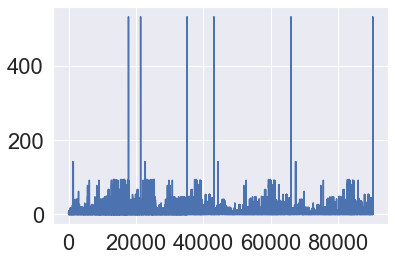

## Splitting Back The DataFrame into training and testing set

In [28]:
X_train = df.iloc[:90347]

X_test = df.iloc[90347:]

In [29]:
X_train.shape

(90347, 63)

In [30]:
X_test.shape

(35202, 63)

# DATA SEGMENTATION
*------------------------------------------------------------------------------*

### Extract the target variables from the data


In [31]:
# DATA SEGMENTATION
y_train = X_train[['Added Sugars']]
X_train = X_train.drop('Added Sugars', axis=1)
y_test = X_test[['Added Sugars']]
X_test = X_test.drop('Added Sugars', axis=1)


In [32]:
# data shape

print(f'XTrain{X_train.shape}, YTrain{y_train.shape}, YTest{y_test.shape}, XTest{X_test.shape}')

XTrain(90347, 62), YTrain(90347, 1), YTest(35202, 1), XTest(35202, 62)


In [33]:
# Normalize the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train =  sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

# MODEL BUILDING AND EVALUATION

In [34]:
# The KNeighbors Regression Model

# Model initialization
knn = KNeighborsRegressor()
# fit the model
knn.fit(X_train, y_train)

# prdedictions
pred = knn.predict(X_test)

In [35]:
# The KNeighbors Model Performance Metrics

print(f'RandomForest MAE : {mean_absolute_error(pred, y_test)}')
print(f'KNeigbors RMSE : {mean_squared_error(pred, y_test, squared=False)}')
print('='*50)
print(f'KNeighbors Score : {r2_score(pred, y_test)*100}')

RandomForest MAE : 0.11803447007699441
KNeigbors RMSE : 0.23008367299355303
KNeighbors Score : 95.44421154748423


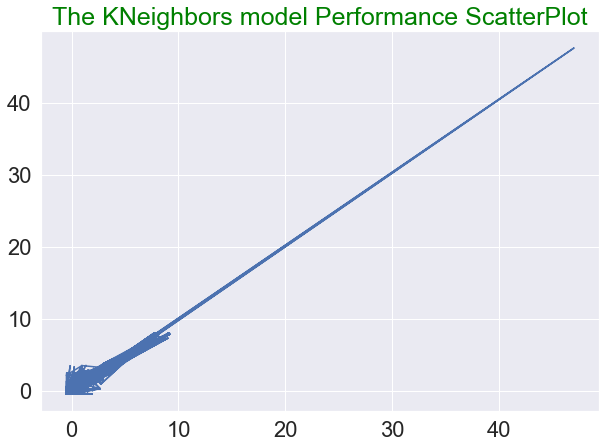

In [44]:
# plotting the KNeighbors model Model Performance ScatterPlot

sns.set_theme(font_scale=2.0)
plt.figure(figsize=(10,7))
plt.plot(pred, y_test)
plt.title('The KNeighbors model Performance ScatterPlot', fontsize=25, color='green')
plt.show()

In [37]:
# Instantiate The RandomForest Regressor Model
forest = RandomForestRegressor()

# fit the model
forest.fit(X_train, y_train)

# Predictions
y_pred = forest.predict(X_test)

In [38]:
# The RandomForest Nodel Performance Metrics

print(f'RandomForest MAE : {mean_absolute_error(y_pred, y_test)}')
print(f'RandomForest RMSE : {mean_squared_error(y_pred, y_test, squared=False)}')
print('='*50)
print(f'RandomForest Score : {r2_score(pred, y_test)*100}')

RandomForest MAE : 0.002715882610540406
RandomForest RMSE : 0.05735549147191011
RandomForest Score : 95.44421154748423


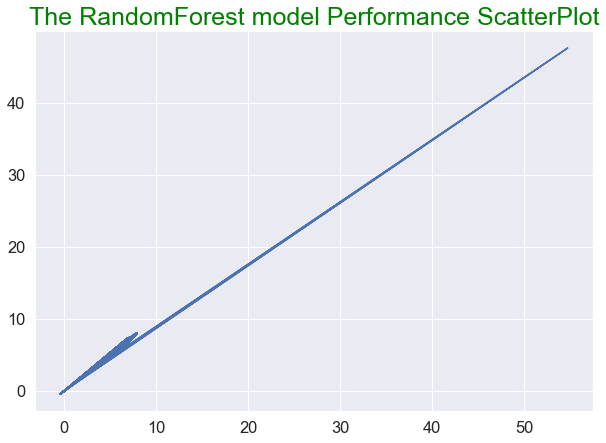

In [43]:
# Plotting The RandomForest Model Performance ScatterPlot
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,7))
plt.plot(y_pred, y_test)
plt.title('The RandomForest model Performance ScatterPlot', fontsize=25, color='green')
plt.show()

## Dump The Random Forest Model into a Pickle file

In [41]:
joblib.dump(forest, 'RandomForestRegressionModel.pkl')

['RandomForestRegressionModel.pkl']